# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [154]:
NAME = "Shuaiyu Fan"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [155]:
import numpy as np
from matplotlib import pyplot as plt

In [156]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [157]:
from astroML.datasets import generate_mu_z

In [158]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.

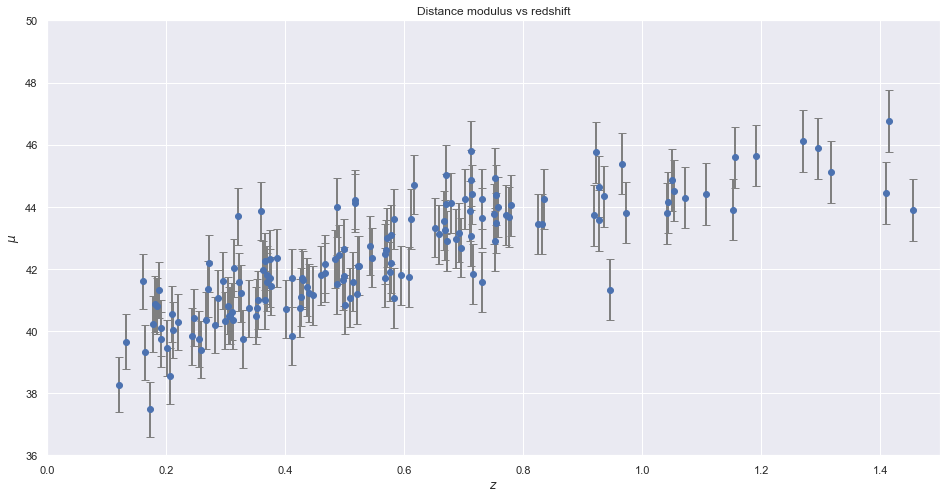

In [159]:
# Plot data
def plot_dist_mod():
    # YOUR CODE HERE
    plt.figure(figsize=(16, 8))
    plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='o', ecolor='grey', color='b', elinewidth=2, capsize=4)
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):

YOUR ANSWER HERE

$$C(\theta) = (X \theta)^{\rm T}X \theta - 2(X \theta)^{\rm T}y.$$

Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):

YOUR ANSWER HERE

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

Solve for $\theta$ by numerically implementing the analytic solution given above.

In [160]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    X_b = np.c_[np.ones((m, 1)), X]    # add x0 = 1 to each instance
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

In [161]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [162]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


Write a method to make a prediction for a given redshift.

In [163]:
def predict_lin_reg(theta, x):
    # YOUR CODE HERE
    x_b = np.c_[np.ones((len(x), 1)), x]    # add x0 = 1 to each instance
    y = x_b.dot(theta)
    return y

Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.

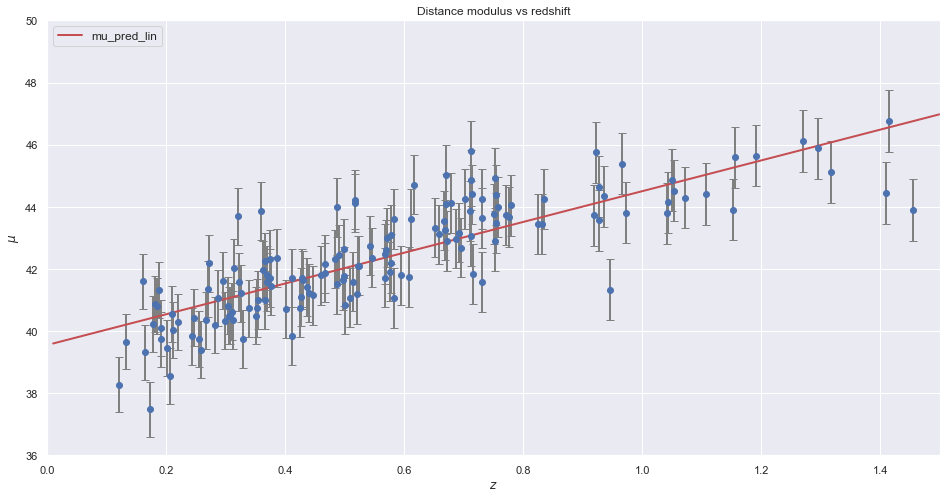

In [164]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
# YOUR CODE HERE
mu_pred_lin = predict_lin_reg(theta, z)
plt.plot(z, mu_pred_lin, "r-", linewidth=2, label="mu_pred_lin")
plt.legend(loc="upper left", fontsize=12)

In [165]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),)

mu_pred_lin defined.


Solve for the parameters $\theta$ using Scikit-Learn.

In [166]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# YOUR CODE HERE
# Train model
lin_reg.fit(z_sample.reshape(-1,1), mu_sample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.

In [168]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    # YOUR CODE HERE
    poly_features = PolynomialFeatures(degree = degree, include_bias = bias)
    z_sample_poly = poly_features.fit_transform(z_sample.reshape(-1, 1))
    return z_sample_poly, poly_features
z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
# YOUR CODE HERE
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(z_sample_poly, mu_sample)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.

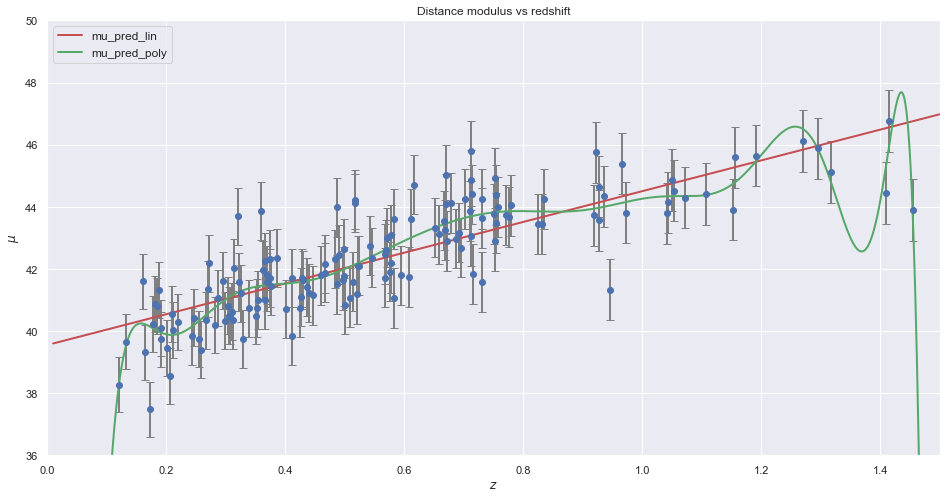

In [170]:
# YOUR CODE HERE
# Plot the distance modulus ( 𝜇 ) vs redhift ( 𝑧 ), including error bars.
plot_dist_mod()

# Plot the predictions of linear regression model
plt.plot(z, mu_pred_lin, "r-", linewidth=2, label="mu_pred_lin")

# Plot the predictions of polynomial regression model
z_poly = poly_features.transform(z.reshape(-1, 1))
mu_pred_poly = lin_reg_poly.predict(z_poly)
plt.plot(z, mu_pred_poly, "g-", linewidth=2, label="mu_pred_poly")

# set legend
plt.legend(loc="upper left", fontsize=12)

In [171]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


Comment on the accuracy of your models.

YOUR ANSWER HERE

**For the linear model:**

The linear model indicates that $\mu$ experiences a general increasing trend as $z$ increases. But there are also many data points which have a significant distance from the model trend line, suggesting that this model is underfitting the data.

**For the polynomial model:**

Compared to the linear model, the polynomial model of degree 15 is a closer match to more data points. But when there are fewer data points, such as at the higher values of $z$, the model has the high amplitude oscillations, suggesting that this model is overfitting the data.

Improve your polynomial model and use the improved model to make predictions.  Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.

In [172]:
# YOUR CODE HERE
# Improve the model by setting polynomial features up to degree 2
z_sample_poly_improved, poly_features_improved = compute_poly_features(2, bias)

# Train model
lin_reg_poly_improved = LinearRegression()
lin_reg_poly_improved.fit(z_sample_poly_improved, mu_sample)

# Predictions
z_poly_improved = poly_features_improved.transform(z.reshape(-1, 1))
mu_pred_poly_improved = lin_reg_poly_improved.predict(z_poly_improved)

In [173]:
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),)

mu_pred_poly_improved defined.


Plot the predictions made with new model and all previous models considered.

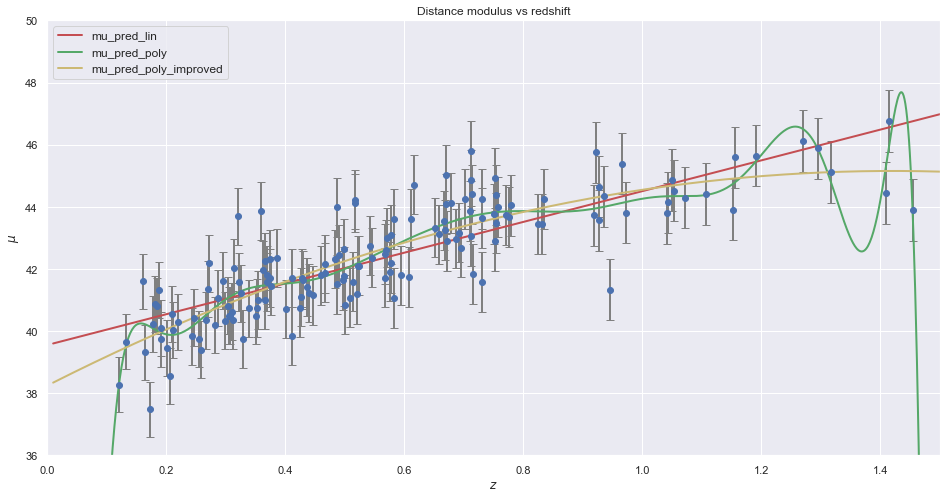

In [174]:
# YOUR CODE HERE
# Plot the distance modulus ( 𝜇 ) vs redhift ( 𝑧 ), including error bars.
plot_dist_mod()

# Plot the predictions of linear regression model
plt.plot(z, mu_pred_lin, "r-", linewidth=2, label="mu_pred_lin")

# Plot the predictions of polynomial regression model (degree of 15)
plt.plot(z, mu_pred_poly, "g-", linewidth=2, label="mu_pred_poly")

# Plot the predictions of improved polynomial regression model (degree of 2)
plt.plot(z, mu_pred_poly_improved, "y-", linewidth=2, label="mu_pred_poly_improved")

# Set legend
plt.legend(loc="upper left", fontsize=12)

Compute the RMS error between your predictions and the *data samples*.

In [175]:
# Define a general function to compute the RMS error
def compute_rms(mu_1, mu_2):
    # YOUR CODE HERE
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(mu_1, mu_2)
    rmse = np.sqrt(mse)
    return rmse

In [176]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [177]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
# YOUR CODE HERE
# Generate predicted values at the z sample points
# Linear model
sample_lin = z_sample.reshape(-1, 1)
mu_sample_lin = lin_reg.predict(sample_lin)

# Polynomial model
sample_poly = poly_features.transform(z_sample.reshape(-1, 1))
mu_sample_poly = lin_reg_poly.predict(sample_poly)

# Improved polynomial model
sample_poly_improved = poly_features_improved.transform(z_sample.reshape(-1, 1))
mu_sample_poly_improved = lin_reg_poly_improved.predict(sample_poly_improved)

rms_sample_lin = compute_rms(mu_sample, mu_sample_lin)
rms_sample_poly = compute_rms(mu_sample, mu_sample_poly)
rms_sample_poly_improved = compute_rms(mu_sample, mu_sample_poly_improved)

In [178]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9331


In [179]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [180]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [181]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


Comment on what models you believe are best.

YOUR ANSWER HERE

**For the linear model: underfitting**

The linear model has the greatest RMSE among the three models, which is 1.0084. This model should be expected to produce the maximum RMSE, because it only depicts a general increasing trend, leaving a large number of data points spaced away from the trend.

**For the polynomial model: overfitting**

The polynomial model has the smallest RMSE of the three models, which is 0.8855. However, having the minimum RMSE does not always mean that this is the best fit, but it may also indicate that the model is overfitting as we discussed before. Meanwhile, the model focuses on fitting as much given data points as possible, making the fitted trend unrepresentative and has the high amplitude oscillations.

**For the improved polynomial model: fit well**

The improved poynomial model secures the middle position on the RMSE value, which is 0.9331. Although this is not the lowest RMSE, this model has a good RMSE which is not too large to be underfitting neither too small to be overfitting. This model therefore achieves a good balance between fitting more data points and having the low amplitude oscillations, indicating that this model is better than the others we considered here.

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [182]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.

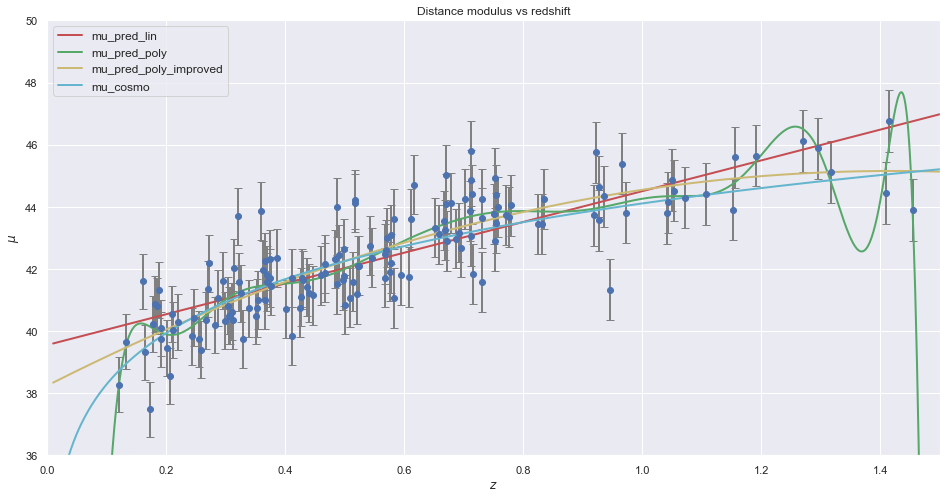

In [183]:
# YOUR CODE HERE
# Plot the distance modulus ( 𝜇 ) vs redhift ( 𝑧 ), including error bars.
plot_dist_mod()

# Plot the predictions of linear regression model
plt.plot(z, mu_pred_lin, "r-", linewidth=2, label="mu_pred_lin")

# Plot the predictions of polynomial regression model (degree of 15)
plt.plot(z, mu_pred_poly, "g-", linewidth=2, label="mu_pred_poly")

# Plot the predictions of improved polynomial regression model (degree of 2)
plt.plot(z, mu_pred_poly_improved, "y-", linewidth=2, label="mu_pred_poly_improved")

# Plot the predictions of the cosmological model
plt.plot(z, mu_cosmo, "c-", linewidth=2, label="mu_cosmo")

# set legend
plt.legend(loc="upper left", fontsize=12)

Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.

In [184]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
rms_cosmo_lin = compute_rms(mu_cosmo, mu_pred_lin)
rms_cosmo_poly = compute_rms(mu_cosmo, mu_pred_poly)
rms_cosmo_poly_improved = compute_rms(mu_cosmo, mu_pred_poly_improved)

In [185]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6643
rms_cosmo_poly_improved = 0.6689


In [186]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [187]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [188]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.

YOUR ANSWER HERE

**For the linear model:**

The RMSE of the linear model is 1.1252, which is higher than the improved polynomial model and much lower than the polynomial model.

**For the polynomial model:**

The RMSE of the polynomial model is the highest (about 20.6643), which is nearly 18 times larger than the linear model and around 30 times larger than the improved polynomial model.

**For the improved polynomial model:**

The RMSE of the improved polynomial model is 0.6689, the lowest among the three models.

When previously comparing the RMSE between the sample data and the three regression models, the result shows that a low RMSE may indicate overfitting, which is absolutely not the best fit to the data points.

However, when comparing the RMSE value between the Cosmological Model and the three regression models, a low RMSE measures how close the three regression models are to the Cosmological Model. The lower the RMSE is, the closer the model is to the Cosmological Model and therefore the more accurate the regression model is. So the improved polynomial model is the most accurate one among the three models we considered.

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [189]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [190]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
# YOUR CODE HERE
X_pd = pd.DataFrame(X, columns=cols)

In [191]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [192]:
# YOUR CODE HERE
# 1 indicates an RR Lyrae, 0 indicates a background star
y_pd = pd.Series(y, dtype=np.uint32)

In [193]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0
1    0
2    0
3    0
4    0
dtype: uint32

Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.

In [194]:
# YOUR CODE HERE
# Method 1
# y_pd.name = 'target'
# X_pd_all = pd.merge(X_pd, y_pd, left_index=True, right_index=True)

# Method 2
y_pd_df = pd.DataFrame({'target':y_pd})
X_pd_all = pd.concat([X_pd, y_pd_df], axis=1)

In [195]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0
1,1.048000,0.339001,0.151999,0.023001,0
2,1.008001,0.341999,0.129000,0.203001,0
3,0.965000,0.392000,0.149000,0.150000,0
4,1.040001,0.333000,0.125999,0.101999,0


Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.

In [196]:
# YOUR CODE HERE
# Method 1
# X_pd_all['target description'] = X_pd_all.target.apply(lambda x: 'Background' if x==0.0 else 'RR Lyrae')

# Method 2
target_description = pd.Series(['Background', 'RR Lyrae'])
target_description.name = 'target description'
X_pd_all = pd.merge(X_pd_all, target_description, left_on='target', right_index=True)

In [197]:
X_pd_all.head()
X_pd_all.tail()

,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1,RR Lyrae


How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?

In [251]:
# YOUR CODE HERE
n_rrlyrae = sum((X_pd_all.target == 1))

In [252]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


How many background stars are there in the dataset (i.e. compute `n_background`)?

In [253]:
# YOUR CODE HERE
n_background = sum((X_pd_all.target == 0))

In [254]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type.

In [202]:
%matplotlib inline
import seaborn as sns; sns.set()

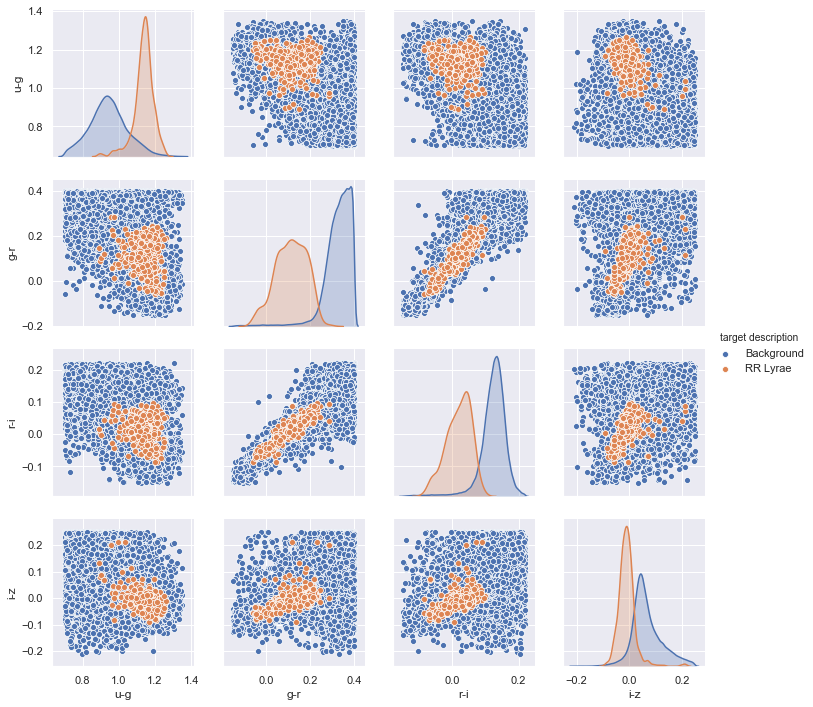

In [203]:
# YOUR CODE HERE
pairplot = sns.pairplot(X_pd_all, kind='scatter', vars=cols, hue="target description")

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [205]:
ind = 0
col=cols[ind]
col

'u-g'

In [206]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

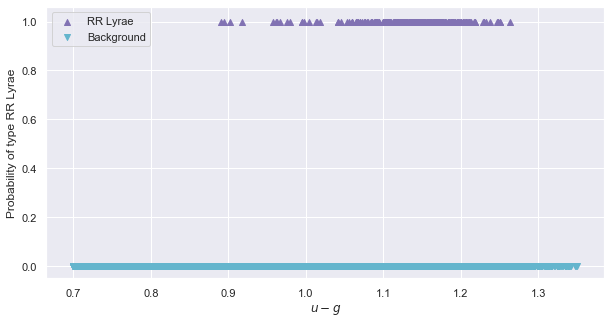

In [207]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

Given the plot shown above, comment on how well you expect logistic regression to perform.

YOUR ANSWER HERE

Given the plot shown above, we can see that RR Lyrae points start to appear at nearly 0.87 and then gradually increases to the maximum at about 1.15, after which the number of RR Lyrae points start to drop and then get sparse at around 1.22. Also, there are no RR Lyrae point beyond 1.28. Since all the RR Lyrae points are concentrated and can reach a maximum in a limited domain area, the logistic regression model can be expected to perform well (only in case of the numbers of instances of different classes are comparable, otherwise the performance of the model will be affected and degrade significantly).

It is obvious that the RR Lyrae points are sparse before the value of 1.05, and mainly concentrate between 1.05 and 1.25. So we can guess a reasonable decision boundary at 1.05, and expect the logistic regression to perform well.

Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.

In [208]:
# YOUR CODE HERE
# The decision boundary we guess
decision_boundary_guess = 1.05

In [209]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.0500


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [210]:
C = 1e10

Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.

In [211]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=C, random_state=1)
clf.fit(X_train_1d, y_train)

/Users/shuaiyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
check_var_defined('clf')

clf defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.

(Ensure your result is a scalar and not an array of length 1.)

In [213]:
# YOUR CODE HERE
# Method 1
# decision_boundary_sklearn = - clf.intercept_ / clf.coef_
# decision_boundary_sklearn = decision_boundary_sklearn[0][0]

# Method 2
# Domain and predictions
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1) 
y_1d_proba = clf.predict_proba(X_1d_new)

# Calcualte the decision boundary
decision_boundary_sklearn = X_1d_new[y_1d_proba[:, 1] >= 0.5][0][0]

In [214]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn defined.
decision_boundary_sklearn = 1.3721


Evaluate the probabilities prediced by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.

In [215]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
# YOUR CODE HERE
y_1d_proba = clf.predict_proba(X_1d_new)

In [216]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.

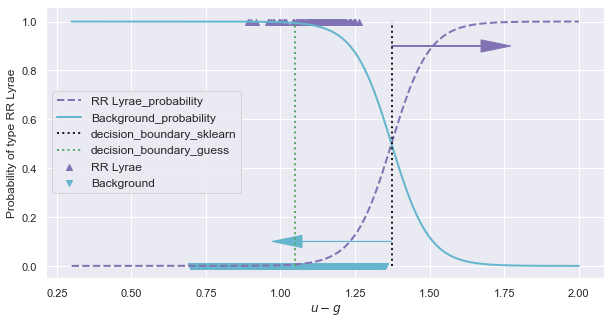

In [217]:
plot_scatter()
# YOUR CODE HERE
# Plot the probability of RR Lyrae and Background stars
plt.plot(X_1d_new, y_1d_proba[:, 1], "m--", linewidth=2, label='RR Lyrae_probability')
plt.plot(X_1d_new, y_1d_proba[:, 0], "c-", linewidth=2, label='Background_probability')

# Plot the two decision boundary
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [0.0, 1.0], "k:", linewidth=2, label='decision_boundary_sklearn')
plt.plot([decision_boundary_guess, decision_boundary_guess], [0.0, 1.0], "g:", linewidth=2, label='decision_boundary_guess')

plt.arrow(decision_boundary_sklearn, 0.9, 0.3, 0, head_width=0.05, head_length=0.1, fc="m", ec="m")
plt.arrow(decision_boundary_sklearn, 0.1, -0.3, 0, head_width=0.05, head_length=0.1, fc="c", ec="c")

# Set legend
plt.legend(loc="center left", fontsize=12)

From inspection of your plot, how would all objects in the training set be classified?

YOUR ANSWER HERE

All objects in the training set would be classified as Background stars because they are all to the left of the decision boundary.

Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.

In [218]:
# YOUR CODE HERE
y_test_1d_pred = clf.predict(X_test_1d)

In [219]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.

In [220]:
# YOUR CODE HERE
n_rrlyrae_pred = np.sum(y_test_1d_pred==1)

In [221]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0


How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.

In [222]:
# YOUR CODE HERE
n_background_pred = np.sum(y_test_1d_pred==0)

In [223]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

(You may drop $i$ superscripts for notational brevity.)

YOUR ANSWER HERE

$$\log(1 - \hat{p}) = - \theta^\text{T} x - \log{(1+\exp{(-\theta^\text{T} x))}} $$

Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.

YOUR ANSWER HERE

$$C(\theta) = \frac{1}{m} \sum[ (1 - y)(\theta^\text{T} x) + \log{(1+\exp{(-\theta^\text{T} x))]}} $$

Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.

YOUR ANSWER HERE

$$\begin{eqnarray}
\frac{\partial C(\theta)}{\partial \theta_j} 
&=& 
\frac{1}{m} \sum 
\left[ \sigma\left(\theta^{\rm T} x \right) - y \right]
x_j\\
\end{eqnarray}$$

Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.

YOUR ANSWER HERE

$$\begin{eqnarray}
\frac{\partial C(\theta)}{\partial \theta} 
&=& 
\frac{1}{m} \ X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]\\
\end{eqnarray}$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

First, define the sigmoid function.

In [224]:
def sigmoid(x):
    # YOUR CODE HERE
    sig = 1 / (1 + np.exp(-x))
    return sig

In [225]:
assert np.isclose(sigmoid(0), 0.5)

Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.

In [226]:
# YOUR CODE HERE
X_train_1d_b = np.c_[np.ones((len(X_train_1d), 1)), X_train_1d]    # add x0=1 to each instance

In [227]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.

In [228]:
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])
# YOUR CODE HERE
m = len(X_train_1d)
y_train_1d_b = y_train.reshape(-1, 1)
for i in range(n_iterations):
    gradient = 1/m * X_train_1d_b.T.dot(sigmoid(X_train_1d_b.dot(theta))-y_train_1d_b)
    theta = theta - alpha * gradient

array([[-21.70119266],
       [ 15.81760695]])

In [229]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7012
theta[1] = 15.8176


Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.

In [230]:
# YOUR CODE HERE
intercept_manual = theta[0][0]
intercept_sklearn = clf.intercept_[0]
intercept_diff = intercept_sklearn - intercept_manual

In [231]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = -9.1829E-04


Compute the difference between the logistic regression model *slope* (i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.

In [232]:
# YOUR CODE HERE
coef_manual = theta[1][0]
coef_sklearn = clf.coef_[0][0]
coeff_diff = coef_sklearn - coef_manual

In [233]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = 8.2292E-04


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.

YOUR ANSWER HERE

The class imbalance problem appears when the classes needed to be classified are not in the same order of magnitude, namely the number of instances in one class is much smaller than that in another class, which can lead to the problem that all instances will be classified as instance of the larger class, leaving the the smaller class have none instance.

In our case here, y_train contains 69855 classifications in total, with only 356 instances are RR Lyrae classifications. The number of instances of RR Lyrae is much smaller than that of Background stars, and all the instances here have been classified as Background stars in the classification. This is how the class imbalance problem manifests itself in the classification problem at hand.

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [234]:
# YOUR CODE HERE
clf_balanced = LogisticRegression(C=C, class_weight='balanced', random_state=1)
clf_balanced.fit(X_train_1d, y_train)

/Users/shuaiyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
check_var_defined('clf_balanced')

clf_balanced defined.


Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.  

(Ensure your result is a scalar and not an array of length 1.)

In [236]:
# YOUR CODE HERE

# Method 1
# decision_boundary_sklearn_balanced = - clf_balanced.intercept_ / clf_balanced.coef_
# decision_boundary_sklearn_balanced = decision_boundary_sklearn_balanced[0][0]
# The calculated value of this method is 1.0597

# Method 2
# Domain and predictions
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

# Calcualte the decision boundary
decision_boundary_sklearn_balanced = X_1d_new[y_1d_proba_balanced[:, 1] >= 0.5][0][0]

In [237]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0607


Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.

In [238]:
# YOUR CODE HERE
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

In [239]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.

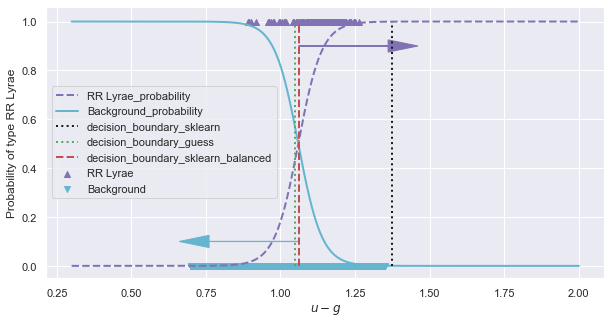

In [255]:
plot_scatter()
# YOUR CODE HERE
# Plot the probability of RR Lyrae and Background stars
plt.plot(X_1d_new, y_1d_proba_balanced[:, 1], "m--", linewidth=2, label='RR Lyrae_probability')
plt.plot(X_1d_new, y_1d_proba_balanced[:, 0], "c-", linewidth=2, label='Background_probability')

# Plot the two decision boundary
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [0.0, 1.0], "k:", linewidth=2, label='decision_boundary_sklearn')
plt.plot([decision_boundary_guess, decision_boundary_guess], [0.0, 1.0], "g:", linewidth=2, label='decision_boundary_guess')
plt.plot([decision_boundary_sklearn_balanced, decision_boundary_sklearn_balanced], [0.0, 1.0], "r--", linewidth=2, label='decision_boundary_sklearn_balanced')

plt.arrow(decision_boundary_sklearn_balanced, 0.9, 0.3, 0, head_width=0.05, head_length=0.1, fc="m", ec="m")
plt.arrow(decision_boundary_sklearn_balanced, 0.1, -0.3, 0, head_width=0.05, head_length=0.1, fc="c", ec="c")

# Set legend
plt.legend(loc="center left", fontsize=11)

Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.

YOUR ANSWER HERE

The decision boundary of the balanced model is closer to our guess that a reasonable decision boundary at 1.05, where the RR Lyrae points start to become dense and then gradually increases to the maximum.

The decision boundary of the unbalanced model is not effective, since the RR Lyrae points mainly concentrate between 1.05 and 1.25, but the decision boundary is out of this range.

So the balanced model provides a much better fit to the training data than the unbalanced one.

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [241]:
ind = 1
cols[:ind+1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [242]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.

In [243]:
# YOUR CODE HERE
clf_2d_logistic = LogisticRegression(C=C, class_weight='balanced', random_state=1)
clf_2d_logistic.fit(X_train_2d, y_train)

/Users/shuaiyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [244]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.

In [245]:
# YOUR CODE HERE

# Method 1: compute precision and recall with conf_matrixd and their expressions
# The output is (0.14158935054457442, 0.9859550561797753)
# from sklearn.metrics import confusion_matrix
# y_train_2d_pred = clf_2d_logistic.predict(X_train_2d)
# conf_matrix = confusion_matrix(y_train, y_train_2d_pred)
# TN, FP, FN, TP = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]
# precision_logistic = TP / (TP + FP)
# recall_logistic = TP / (TP + FN)

# Method 2: compute precision and recall using precision_score, recall_score directly
# The output is (0.14158935054457442, 0.9859550561797753)
# Both methods have the same results
from sklearn.metrics import precision_score, recall_score
y_train_2d_pred = clf_2d_logistic.predict(X_train_2d)
precision_logistic = precision_score(y_train, y_train_2d_pred)
recall_logistic = recall_score(y_train, y_train_2d_pred)

In [246]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.141589


In [247]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.985955


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [248]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

[0.7, 1.45, -0.15, 0.4]

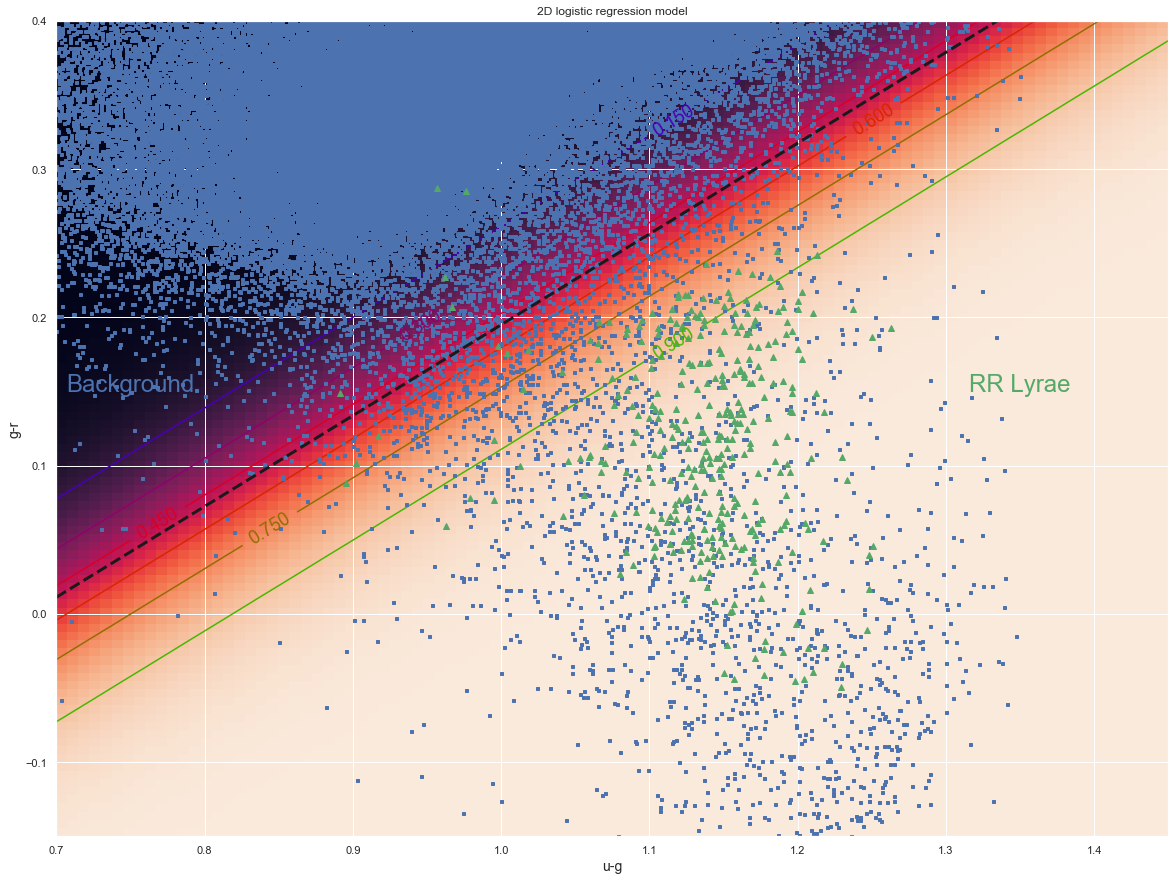

In [269]:
# YOUR CODE HERE
plt.figure(figsize=(20, 15))

# Generate probabilities
X_train_2d_new = np.c_[xx.ravel(), yy.ravel()]
y_proba = clf_2d_logistic.predict_proba(X_train_2d_new)
zz = y_proba[:, 1].reshape(xx.shape)

# Plot the predicted classification probability
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=2, fontsize=18)
plt.imshow(zz, origin='lower', extent=[0.7, 1.45, -0.15, 0.4])

# Plot the data instances
plt.plot(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], "bs", markersize=3)
plt.plot(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], "g^")

# Plot the decision boundary
left_right = np.array(xlim) 
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.text(0.75, 0.15, "Background", fontsize=24, color="b", ha="center")
plt.text(1.35, 0.15, "RR Lyrae", fontsize=24, color="g", ha="center")
plt.title("2D logistic regression model")
plt.xlabel("u-g", fontsize=14)
plt.ylabel("g-r", fontsize=14)
plt.axis([0.7, 1.45, -0.15, 0.4])

Now train an SVM classifier that can support a non-linear decision boundary on the same problem.

In [342]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Method 1: Non-linear classification with polynomial features
# Here we need to give the parameter C and also the degree for poly_features
# from sklearn.preprocessing import PolynomialFeatures
# clf_svm_polynomial = Pipeline((
#     ("poly_features", PolynomialFeatures(degree=9)),
#     ("scaler", StandardScaler()),
#     ("svm_clf", LinearSVC(C=C, loss="hinge", random_state=1))
# ))
# clf_svm_polynomial.fit(X_train_2d, y_train)


# Method 2: Non-linear classification with kernels 
# Here we need to give the hyperparameters: gamma and C
from sklearn.svm import SVC

gamma = 0.01
C = 1000
clf_svm_kernel_rbf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", class_weight='balanced', gamma=gamma, C=C))
))
clf_svm_kernel_rbf.fit(X_train_2d, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.01,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.

[0.7, 1.45, -0.15, 0.4]

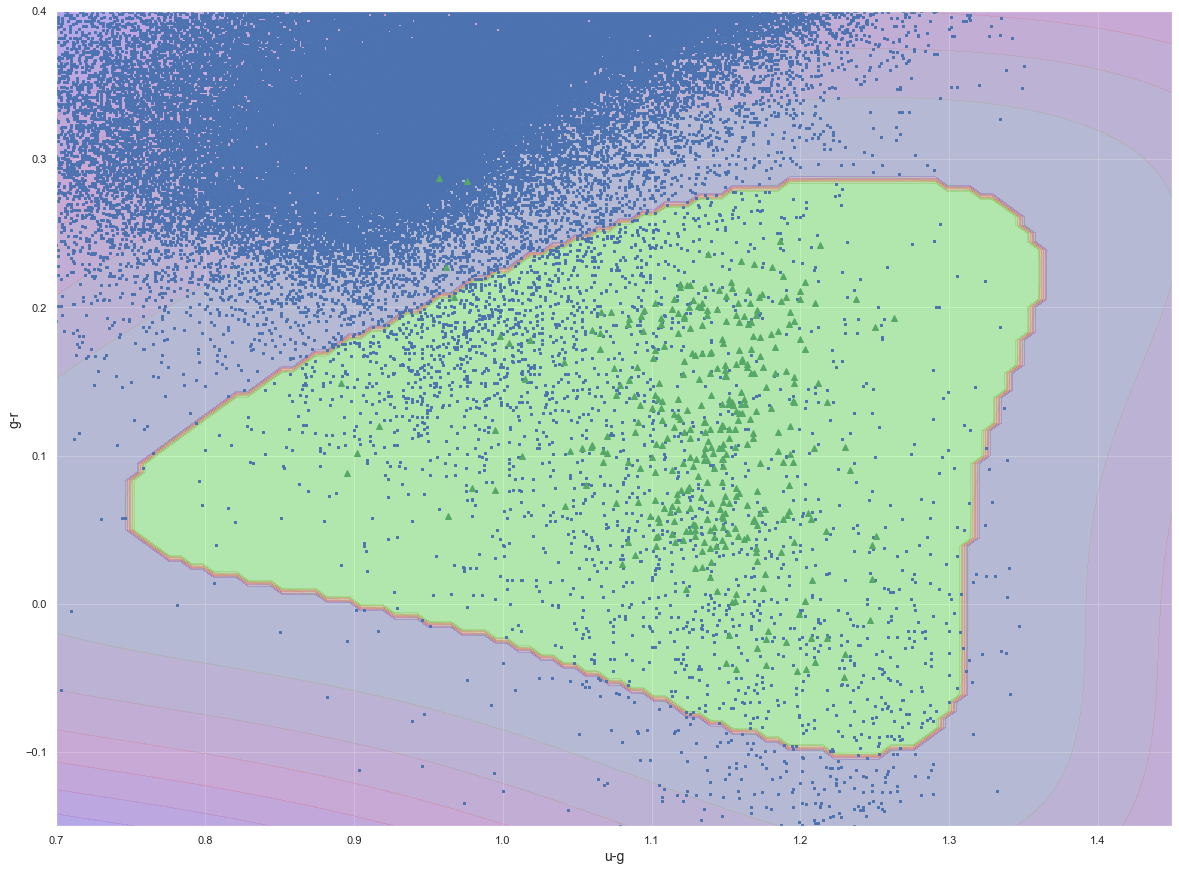

In [350]:
# YOUR CODE HERE
plt.figure(figsize=(20, 15))

# Generate probabilities
y_pred_svm = clf_svm_kernel_rbf.predict(X_train_2d_new).reshape(xx.shape)
y_decision = clf_svm_kernel_rbf.decision_function(X_train_2d_new).reshape(xx.shape)

# Plot the predicted classification probability
plt.contourf(xx, yy, y_pred_svm, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(xx, yy, y_decision, cmap=plt.cm.brg, alpha=0.1)
#plt.imshow(y_proba.reshape(100,100), origin='lower', extent=[0.7, 1.45, -0.15, 0.4])
#plt.imshow(zz, origin='lower', extent=[0.7, 1.45, -0.15, 0.4])

# Plot the data instances
plt.plot(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], "bs", markersize=2)
plt.plot(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], "g^")

plt.xlabel("u-g", fontsize=14)
plt.ylabel("g-r", fontsize=14)
plt.axis([0.7, 1.45, -0.15, 0.4])

Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.

In [344]:
# YOUR CODE HERE
from sklearn.metrics import precision_score, recall_score

y_train_2d_svm_pred = clf_svm_kernel_rbf.predict(X_train_2d)

precision_svm = precision_score(y_train, y_train_2d_svm_pred)
recall_svm = recall_score(y_train, y_train_2d_svm_pred)

In [345]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.134733


In [346]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.991573


Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.

YOUR ANSWER HERE

The decision boundary of the SVM model is a closed ring, while the decision boundary of the logistic regression model is a single line. In this way, the points included by the SVM boundary are more likely to be true RR Lyrae points, and this model can reduce the the possibility of misclassification. So it can improve the the effectiveness of the SVM model when determining which class the test points should belong to.